<a href="https://colab.research.google.com/github/HIRAL13CHOKSI/PROJECTS/blob/main/Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INCOME CLASSIFICATION**
 HIRAL CHOKSI

---



-  Accurate income data is one of the hardest piece of data
to obtain across the world.
-  Subsidy Inc. has obtained a large data set of
authenticated data on individual income, demographic
parameters, and a few financial parameters.
-  Subsidy Inc. wishes us to:
Develop an income classifier system for individuals.





---



---

# **SOLUTION** : Simplify the data system by reducing the number of variables to be studies, without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse


---



---



## **1) Importing Libraries**








In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

## **2)** **Importing Dataset**

In [ ]:
data = pd.read_csv('incomeds.csv')


## **3) Exploratory data analysis**














In [ ]:
# a) Inspecting the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
data.shape


(31978, 13)

In [ ]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
#  b) Checking for missing values

In [ ]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data.describe(include ="O")


,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [ ]:
# c) frequency of each categories

In [ ]:
data['JobType'].value_counts()


Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: JobType, dtype: int64

In [ ]:
data['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
print(np.unique(data['JobType']))

['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


In [ ]:
print(np.unique(data['occupation']))

['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [ ]:
# d) Reading the data again

In [ ]:
data = pd.read_csv('incomeds.csv',na_values=["?"])

e) Data Pre-processing

In [ ]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

## **4) Data Cleaning**



In [ ]:
missing_rows = data[data.isnull().any(axis=1)]
# axis=1 here we have used that to consider at least one cloumn value is missing


By this we can say that

1) JobType Missing values : 1809


2) Occupation Missing values : 1816


3)Total the missing values are in two columns i.e Occupation & Job-type and this have 1809 missing rows


4) The occupation column is unfilled for (1816-1809) = 7 rows


In [ ]:
income = data.dropna(axis=0)
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
income.shape

(30162, 13)

## **5) Data Visualization**


<AxesSubplot:>

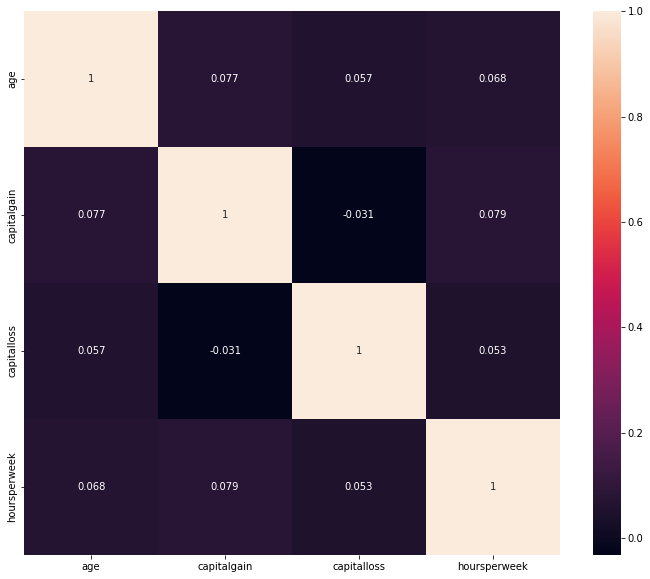

In [ ]:
#for knowing the relationship between the independent variable
correlation=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

Extracting the column names

In [ ]:
income.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Gender proportion table:

In [ ]:
gender = pd.crosstab(index = income["gender"], columns = 'count' ,normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


Gender vs Salary Status :

In [ ]:
gender_salstat = pd.crosstab(index = income["gender"], columns = income["SalStat"],margins = True,normalize = 'index')
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


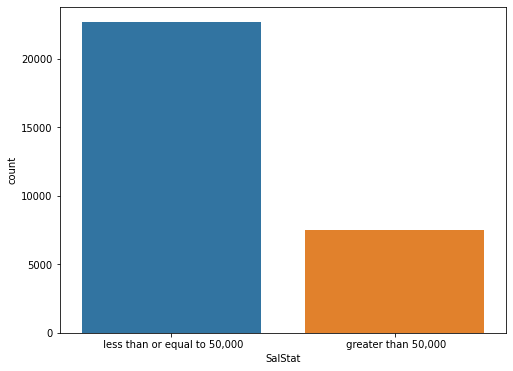

In [ ]:
ax, fig = plt.subplots(figsize=[8,6])
SalStat = sns.countplot(income['SalStat'])

### 75% of people's salary is less than or equal to 50,000
### 25% of people's salary is more than 50,000

<AxesSubplot:xlabel='age'>

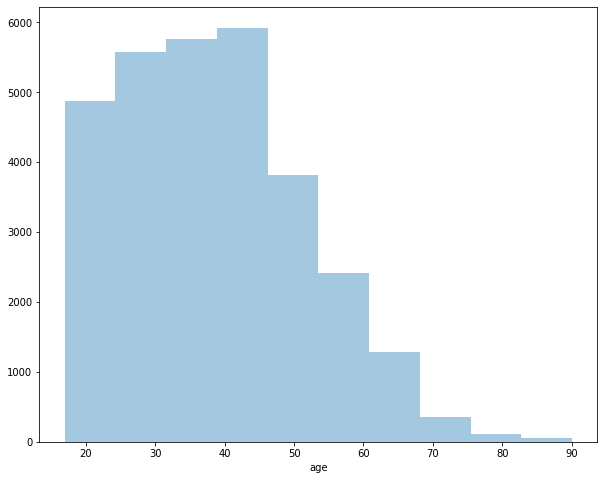

In [ ]:
ax, fig = plt.subplots(figsize=[10,8])
sns.distplot(income['age'], bins=10, kde=False)
#histogram of age

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

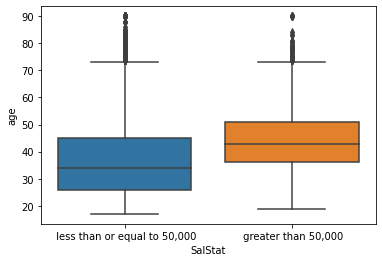

In [ ]:
#to check how age affects the salary status
sns.boxplot('SalStat', 'age', data=income)
income.groupby('SalStat')['age'].median()

In [ ]:
#Jobtype vs Salary status

<AxesSubplot:xlabel='JobType', ylabel='count'>

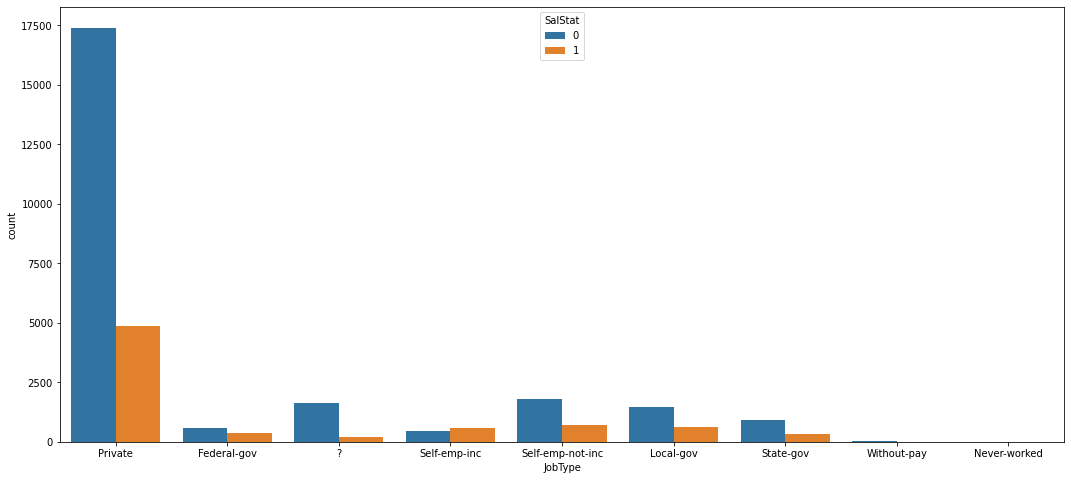

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = "JobType" , hue = "SalStat" , data = income)

In [ ]:
job_salstat =pd.crosstab(index = income["JobType"],columns = income['SalStat'], margins = True, normalize =  'index')
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


## Here, by this analysis we can say that 56% of self employed people earn more than 50000 per year and 44% of self employed people earn less than 50000 per year

# SO, THE JOBTYPE IS AN IMPORTANT VARIABLE IN AVOIDING THE MISUSE OF SUBSIDIES

In [ ]:
#OCCUPATION vc Salary Status

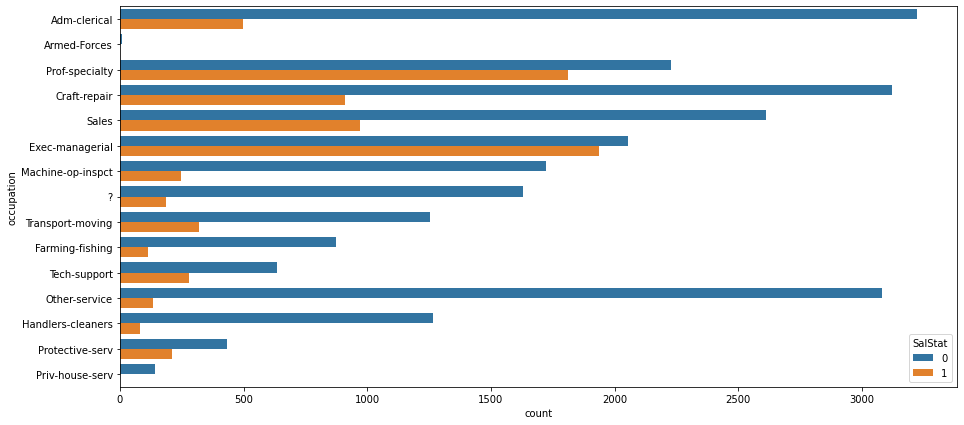

In [ ]:
ax, fig = plt.subplots(figsize=[15,7])
Occupation  = sns.countplot(y=income['occupation'],hue = 'SalStat', data=income)

In [ ]:
job_salstat =pd.crosstab(index = income["occupation"],columns = income['SalStat'], margins = True, normalize =  'index')
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


The ones who have made more that 50000 per year are having more chance to work as managers and professionals. Hence, this is an important variable in avoiding the misuse of subsidies

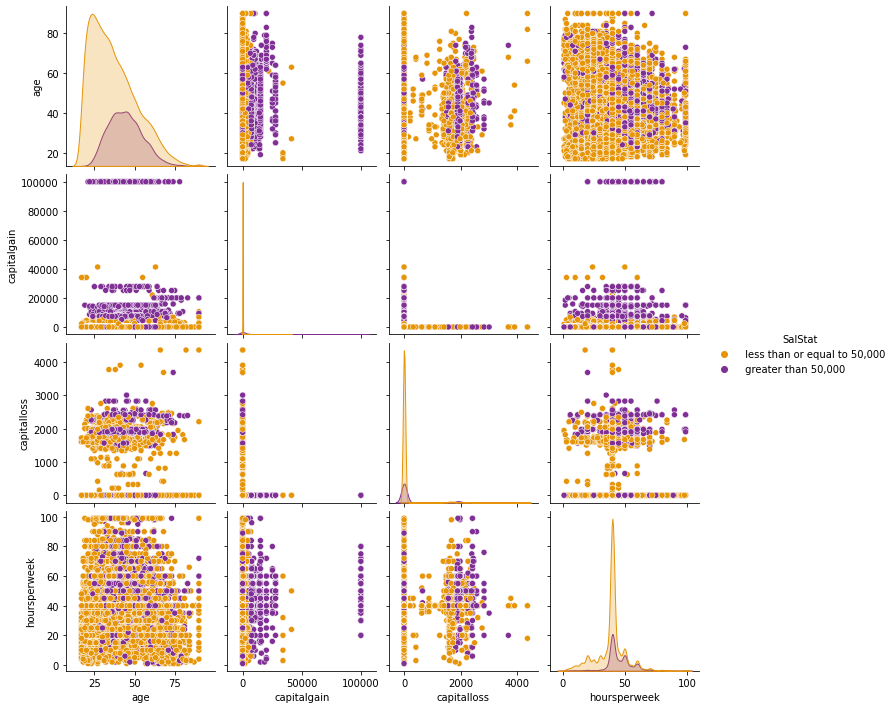

In [ ]:
sns.pairplot(data, hue ="SalStat" , palette = 'CMRmap_r')


# *LOGISTIC REGRESSION*

In [ ]:
#Reindexing the salary status as 0 , 1


In [ ]:
income['SalStat']=income['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(income['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-89-0cf15bca7438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['SalStat']=income['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


The method which we have used here is **Integer encoding**.So, that we can invert the encoding later and get labels back from integer values .

## **6)** **Data Modeling**

Here for making a prediction we are using pandas function to get dummies so that we can convert the categorical variables into dummy variables which is called as **one hot encoding**.

In [ ]:
data= pd.get_dummies(income, drop_first=True)


In [ ]:
columns_list=list(data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_Local-gov',
 'JobType_Private',
 'JobType_Self-emp-inc',
 'JobType_Self-emp-not-inc',
 'JobType_State-gov',
 'JobType_Without-pay',
 'EdType_11th',
 'EdType_12th',
 'EdType_1st-4th',
 'EdType_5th-6th',
 'EdType_7th-8th',
 'EdType_9th',
 'EdType_Assoc-acdm',
 'EdType_Assoc-voc',
 'EdType_Bachelors',
 'EdType_Doctorate',
 'EdType_HS-grad',
 'EdType_Masters',
 'EdType_Preschool',
 'EdType_Prof-school',
 'EdType_Some-college',
 'maritalstatus_Married-AF-spouse',
 'maritalstatus_Married-civ-spouse',
 'maritalstatus_Married-spouse-absent',
 'maritalstatus_Never-married',
 'maritalstatus_Separated',
 'maritalstatus_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protecti

In [ ]:
features=list(set(columns_list)-set(['SalStat']))
features

['occupation_Farming-fishing',
 'nativecountry_Columbia',
 'nativecountry_India',
 'nativecountry_Puerto-Rico',
 'EdType_5th-6th',
 'EdType_HS-grad',
 'hoursperweek',
 'race_Black',
 'EdType_7th-8th',
 'occupation_Machine-op-inspct',
 'gender_Male',
 'nativecountry_Philippines',
 'JobType_Local-gov',
 'occupation_Protective-serv',
 'JobType_Without-pay',
 'occupation_Priv-house-serv',
 'nativecountry_Honduras',
 'nativecountry_United-States',
 'race_White',
 'occupation_Tech-support',
 'nativecountry_Poland',
 'occupation_Craft-repair',
 'nativecountry_Mexico',
 'maritalstatus_Married-civ-spouse',
 'relationship_Other-relative',
 'nativecountry_Iran',
 'nativecountry_Ireland',
 'capitalloss',
 'capitalgain',
 'nativecountry_Haiti',
 'nativecountry_Nicaragua',
 'nativecountry_England',
 'nativecountry_Hong',
 'EdType_Preschool',
 'EdType_Prof-school',
 'race_Asian-Pac-Islander',
 'relationship_Wife',
 'nativecountry_Outlying-US(Guam-USVI-etc)',
 'nativecountry_South',
 'EdType_Some-coll

In [ ]:
#independent variable
x=data[features].values #inputvalues
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#dependent variable
y=data['SalStat'].values #outputvalues
print(y)

[0 0 1 ... 0 0 0]


## Splitting the data into train and test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Instance of the model

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train) #fitting the model on the train set

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Co-efficient values of the variables

In [ ]:
lr_model.coef_

array([[-5.60020013e-01, -3.81067352e-02, -2.64433194e-02,
        -7.14753141e-02, -2.80455072e-01, -8.51859511e-01,
         5.98304603e-03, -5.79583684e-01, -5.25486620e-01,
        -5.06462839e-01,  1.14476224e-01, -3.38520920e-02,
        -2.79696808e-01,  5.01547450e-02, -1.10920528e-02,
        -5.72520407e-02, -8.15159063e-03, -2.80139314e-01,
        -3.95288716e-01,  2.74400891e-01, -3.04168098e-02,
        -3.11964692e-01, -5.00466146e-01,  1.13884969e+00,
        -4.15599382e-01, -1.16137812e-02, -1.39720061e-03,
         6.67650746e-04, -9.99702146e-03, -2.68455785e-02,
        -3.24480698e-02,  2.95763885e-04,  2.30770201e-03,
        -4.30879236e-03, -4.65447041e-02,  3.82680473e-01,
        -3.15737450e-01,  3.80084157e-01, -8.74514772e-03,
        -6.83451302e-02, -3.32385217e-01, -4.13404048e-03,
         1.50361415e-02, -5.26990399e-02, -2.20307756e-03,
        -8.41623273e-01, -5.10173640e-01, -3.68661293e-01,
        -2.43039024e-01,  8.82830137e-01, -3.12551491e-0

Prediction from test data

In [ ]:
Predection_1 = lr_model.predict(x_test)
print(Predection_1)

[0 0 0 ... 0 0 0]


CONFUSION MATRIX : Evaluation of the performance of the classification model we have done by confusioon matrix





In [ ]:
confusion_matrix = confusion_matrix(y_test , Predection_1 )
print(confusion_matrix)

[[4522  359]
 [ 595  920]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, Predection_1)*100
print(accuracy_score)

85.0844277673546


We got an accuracy around 85 in our model while predicting

In [ ]:
print('Misclassified samples : %d' % (y_test != Predection_1).sum())

Misclassified samples : 954


                                                      * THANK YOU*

---



---



PROJECT BY: HIRAL CHOKSI
